In [8]:
"""Analyze a portfolio.

Copyright 2017, Georgia Tech Research Corporation
Atlanta, Georgia 30332-0415
All Rights Reserved
"""

import datetime as dt

import numpy as np
import dask
import dask.dataframe as dd

import pandas as pd
#from dask_util import get_data, plot_data
import os

In [9]:
from dask.distributed import Client

client = Client(n_workers=4, threads_per_worker=2, memory_limit='1GB')
client

/home/nobu/miniconda3/envs/ml4t/lib/python3.7/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39723 instead
  f"Port {expected} is already in use.\n"


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:39723/status,
Dashboard: http://127.0.0.1:39723/status,Workers: 4
Total threads: 8,Total memory: 3.73 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35055,Workers: 4
Dashboard: http://127.0.0.1:39723/status,Total threads: 8
Started: Just now,Total memory: 3.73 GiB
Comm: tcp://127.0.0.1:36887,Total threads: 2
Dashboard: http://127.0.0.1:35647/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:44293,


In [10]:
def get_data(symbols, dates, addSPY=True, colname="Adj Close"):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    stock_df = None
    # "D:\fintech\ml4t\ML4T_2023Sum\data"
    base_dir = "mnt/d/fintech/ml4t/ML4T_2023Sum/data"

    if addSPY and "SPY" not in symbols:  # add SPY for reference, if absent
        symbols = ["SPY"] + list(
            symbols
        )  # handles the case where symbols is np array of 'object'
  		  	   		  		 			  		 			 	 	 		#"D:\fintech\ml4t\ML4T_2023Sum\data\AAPL.csv"
    for symbol in symbols:
        path_to_csv = f"/mnt/d/fintech/ml4t/ML4T_2023Sum/data/{symbol}.csv"

        print(f'path_to_csv: {path_to_csv}')
        df_temp = dd.read_csv(
            path_to_csv,
            parse_dates=True,
            usecols=["Date", colname],
            na_values=["nan"]
        ).set_index('Date', sorted=True)
        df_temp = df_temp.rename(columns={colname: symbol})
        if stock_df is None:
            stock_df = df_temp
        else:
            stock_df = stock_df.join(df_temp)

    #if symbol == "SPY":  # drop dates SPY did not trade
    stock_df = stock_df.dropna(subset=["SPY"])

    return stock_df  		  	   		  

In [11]:
def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):  		  	   		  		 			  		 			 	 	 		 		 	
    import matplotlib.pyplot as plt

    df.drop('Date', axis=1, inplace=True) # drop date column
  		  	   		  		 			  		 			 	 	 		 		 	
    """Plot stock prices with a custom title and meaningful axis labels."""  		  	   		  		 			  		 			 	 	 		 		 	
    ax = df.plot(title=title, fontsize=12)  		  	   		  		 			  		 			 	 	 		 		 	
    ax.set_xlabel(xlabel)  		  	   		  		 			  		 			 	 	 		 		 	
    ax.set_ylabel(ylabel)

    ax.legend(title='Daily Prices Comparison')
    plt.show()  		  	   		  		 			  		 			 	 	 		 		 	


In [ ]:
"""
    Estimate a set of test points given the model we built.

    :param sd: A datetime object that represents the start date, defaults to 1/1/2008
    :type sd: datetime
    :param ed: A datetime object that represents the end date, defaults to 1/1/2009
    :type ed: datetime
    :param syms: A list of 2 or more symbols that make up the portfolio (note that your code should support any symbol in the data directory)
    :type syms: list
    :param allocs:  A list of 2 or more allocations to the stocks, must sum to 1.0
    :type allocs: list
    :param sv: The starting value of the portfolio
    :type sv: int
    :param rfr: The risk free return per sample period that does not change for the entire date range (a single number, not an array)
    :type rfr: float
    :param sf: Sampling frequency per year
    :type sf: float
    :param gen_plot: If True, optionally create a plot named plot.png. The autograder will always call your
        code with gen_plot = False.
    :type gen_plot: bool
    :return: A tuple containing the cumulative return, average daily returns,
        standard deviation of daily returns, Sharpe ratio and end value
    :rtype: tuple
    """

In [15]:
prices_all = None
prices = None
prices_SPY = None

sd = dt.datetime(2002, 5, 31)
ed = dt.datetime(2012, 5, 31)
symbols = ["GOOG", "AAPL", "GLD", "XOM"]
allocations = [0.2, 0.3, 0.4, 0.1]
start_val = 1000000
risk_free_rate = 0.0
sample_freq = 252
# Read in adjusted closing prices for given symbols, date range
dates = pd.date_range(sd, ed)
# prices_all is a df
prices_all = get_data(symbols, dates)  # automatically adds SPY
prices = prices_all[symbols]  # only portfolio symbols
prices_SPY = prices_all["SPY"]  # only SPY, for comparison later


path_to_csv: /mnt/d/fintech/ml4t/ML4T_2023Sum/data/SPY.csv
path_to_csv: /mnt/d/fintech/ml4t/ML4T_2023Sum/data/GOOG.csv
path_to_csv: /mnt/d/fintech/ml4t/ML4T_2023Sum/data/AAPL.csv
path_to_csv: /mnt/d/fintech/ml4t/ML4T_2023Sum/data/GLD.csv
path_to_csv: /mnt/d/fintech/ml4t/ML4T_2023Sum/data/XOM.csv


In [18]:
! python -m pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


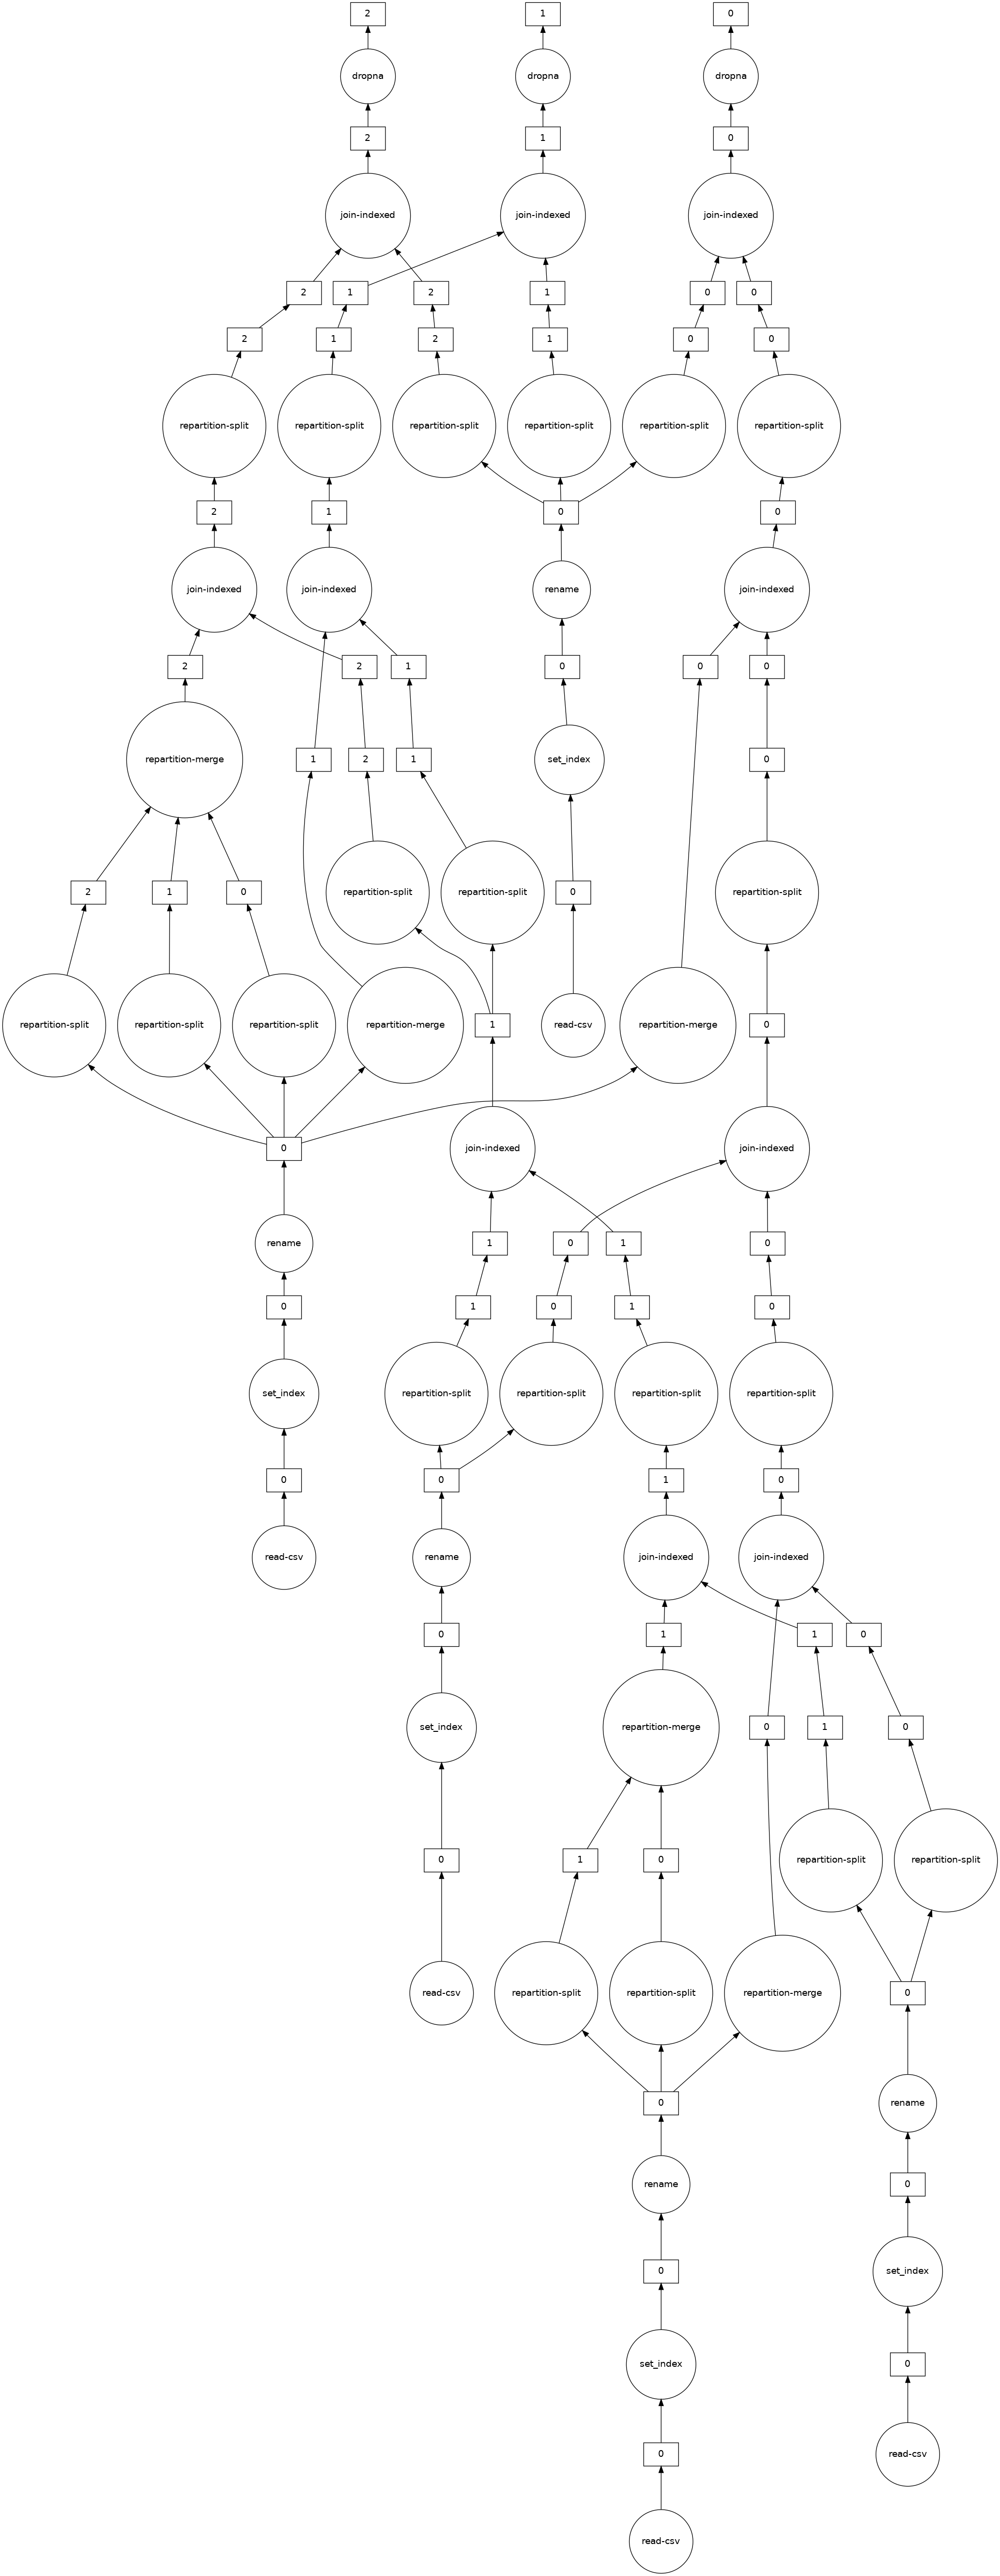

In [19]:
prices_all.visualize()

In [20]:
prices_all.head()

,SPY,GOOG,AAPL,GLD,XOM
Date,,,,,
2004-08-18,93.93,NaN,15.80,NaN,37.71
2004-08-17,92.97,NaN,15.37,NaN,37.33
2004-08-16,92.45,NaN,15.32,NaN,37.95
2004-08-13,91.50,NaN,15.35,NaN,37.81
2004-08-12,91.32,NaN,15.12,NaN,37.50


In [21]:
len(prices_all)

3175

In [22]:
prices.head(10)

,GOOG,AAPL,GLD,XOM
Date,,,,
2004-08-18,NaN,15.80,NaN,37.71
2004-08-17,NaN,15.37,NaN,37.33
2004-08-16,NaN,15.32,NaN,37.95
2004-08-13,NaN,15.35,NaN,37.81
2004-08-12,NaN,15.12,NaN,37.50
2004-08-11,NaN,15.44,NaN,37.98
2004-08-10,NaN,15.69,NaN,37.89
2004-08-09,NaN,15.09,NaN,38.12
2004-08-06,NaN,14.83,NaN,37.75


In [23]:
prices_SPY.head(10)

Date
2004-08-18    93.93
2004-08-17    92.97
2004-08-16    92.45
2004-08-13    91.50
2004-08-12    91.32
2004-08-11    92.33
2004-08-10    92.52
2004-08-09    91.34
2004-08-06    91.21
2004-08-05    92.54
Name: SPY, dtype: float64

In [26]:
prices.head(10)

,GOOG,AAPL,GLD,XOM
Date,,,,
2004-08-18,NaN,15.80,NaN,37.71
2004-08-17,NaN,15.37,NaN,37.33
2004-08-16,NaN,15.32,NaN,37.95
2004-08-13,NaN,15.35,NaN,37.81
2004-08-12,NaN,15.12,NaN,37.50
2004-08-11,NaN,15.44,NaN,37.98
2004-08-10,NaN,15.69,NaN,37.89
2004-08-09,NaN,15.09,NaN,38.12
2004-08-06,NaN,14.83,NaN,37.75


In [28]:
prices.iloc[0]

NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.

In [27]:
prices.iloc[0,:].values

NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.

In [24]:
normed = prices / prices.iloc[0].values
# has dates
normed = dd.DataFrame(normed)
allocs = np.asarray(allocations)

alloced = normed * allocs
pos_vals = alloced * start_val
port_vals = pos_vals.sum(axis=1)

NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.

In [12]:
# This is the function that will be tested by the autograder
# The student must update this code to properly implement the functionality
'''
def assess_portfolio(
        sd=dt.datetime(2008, 1, 1),
        ed=dt.datetime(2009, 1, 1),
        syms=["GOOG", "AAPL", "GLD", "XOM"],
        allocs=[0.1, 0.2, 0.3, 0.4],
        sv=1_000_000,
        rfr=0.0,
        sf=252.0,  # sampling freq or trading days
        gen_plot=False,
):
'''

    # Get daily portfolio value
    # port_val = prices_SPY  # add code here to compute daily portfolio values
    # day one divide the sv by alloc over the portfolio should sum to sv
    # I now have num shares for each stock, using this calculate pv on each day
    # print(f'prices_all shape: {prices_all.shape}, prices_all[0]: {prices_all.iloc[0].values}')



    # do same for SPY but not sum
    '''
    normedSPY = pd.DataFrame(prices_SPY)
    allocedSPY = normedSPY.values * 1.0
    pos_valsSPY = allocedSPY * sv
    pos_valsSPY = pd.DataFrame(pos_valsSPY)
    '''


# day_i / day_(i-1) - 1
daily_rets = [((port_vals[i] / port_vals[i - 1]) - 1) for i in range(1, len(port_vals))]
daily_rets = [0] + daily_rets
daily_rets = np.asarray(daily_rets)
assert len(daily_rets) == len(port_vals)

    # todo: do the daily rets for SPY then make another dataframe start at 1m and use the daily rets
    #  to fill in values.

    drspy = [((prices_SPY[i] / prices_SPY[i - 1]) - 1) for i in range(1, len(prices_SPY))]
    drspy = [0] + drspy
    firstColName = 'values_spy'
    prices_SPY = dd.DataFrame(prices_SPY.values,index=prices_SPY.index, columns=[firstColName])
    #drspy = np.asarray(drspy)
    prices_SPY.drop(firstColName, axis=1, inplace=True)
    prices_SPY[firstColName] = drspy
    spyVal, dailySpyValsDf = calculateSPYEndValFromSV(prices_SPY, startingValue=1_000_000)

    # Get portfolio statistics (note: std_daily_ret = volatility)
    # cumulative return, average daily returns,
    # standard deviation of daily returns, Sharpe ratio and end value
    cr, adr, sddr, sr = [
        0.25,
        0.001,
        0.0005,
        2.1,
    ]  # add code here to compute stats
    port_vals = dd.DataFrame(port_vals, columns=['daily_value'])
    cr = (port_vals.iloc[-1].values / port_vals.iloc[0].values) - 1
    adr = daily_rets.mean()
    sddr = daily_rets.std()
    sharpeRatioAdjustment = np.sqrt(sf)
    # 10 basis points is 1 percent
    basis_pt_factor = 10.
    sr = sharpeRatioAdjustment * ((adr * basis_pt_factor - (calculate_daily_rf(rfr, sf) * basis_pt_factor)) / daily_rets.std())


    # Compare daily portfolio value with SPY using a normalized plot
    if gen_plot:
        # add code to plot here
        dailySpyValsDf.rename(columns={dailySpyValsDf.columns[0]: 'daily_value'}, inplace=True)

        df_temp = dd.concat(
            [port_vals, dailySpyValsDf], keys=["Portfolio", "SPY"], axis=1
        )
        df_dates = df_temp.loc[sd:ed]

        df_dates.to_csv('portVsSpy.csv', index=True)
        plot_data(df_dates, title="Stock prices", xlabel="Date", ylabel="Price")

    # Add code here to properly compute end value
    ev = port_vals['daily_value'].iloc[-1]
    #ev = np.asarray(port_vals)[-1][0]

    return cr, adr, sddr, sr, ev


def calculateSPYEndValFromSV(dailyReturnSPY, startingValue=1_000_000):
    '''
    dailyReturnSPY is the daily return of spy, now multiply by each days's return + 1 since there
    negative values to get a final value and return
    also need each day's value for plot
    '''
    firstColAsList = dailyReturnSPY.iloc[:, 0].tolist()
    spyDailyVal = [0 for x in range(len(firstColAsList))]
    spyDailyVal[0] = startingValue
    for i in range(1, dailyReturnSPY.shape[0]):
        dr = dailyReturnSPY.iat[i, 0]
        dailyReturn = dailyReturnSPY.iloc[i,:].values[0]
        spyDailyVal[i] = spyDailyVal[i-1] * (1+dailyReturn)
    '''
    for idx, row in dailyReturnSPY.iterrows():
        dailyReturn = row.values[0]
        spyDailyVal[idx] = spyDailyVal[idx-1] * (1+dailyReturn)
    '''
    finalValue = spyDailyVal[-1]
    firstColName = dailyReturnSPY.columns[0]
    dailyReturnSPY.drop(firstColName, axis=1, inplace=True)
    dailyReturnSPY[firstColName] = spyDailyVal

    return finalValue, dailyReturnSPY


def calculate_daily_rf(rfr, sf=252.0):
    if rfr < -1.0:
        raise ValueError("Risk-free rate cannot be negative.")
    if sf <= 0.0:
        raise ValueError("Sampling frequency must be positive.")
    daily_rf = ((1 + rfr) ** (1 / sf)) - 1.0

    return daily_rf


In [13]:
def test_code():
    """
    Performs a test of your code and prints the results
    """
    # This code WILL NOT be tested by the auto grader
    # It is only here to help you set up and test your code

    # Define input parameters
    # Note that ALL of these values will be set to different values by
    # the autograder!
    start_date = dt.datetime(2002, 5, 31)
    end_date = dt.datetime(2012, 5, 31)
    symbols = ["GOOG", "AAPL", "GLD", "XOM"]
    allocations = [0.2, 0.3, 0.4, 0.1]
    start_val = 1000000
    risk_free_rate = 0.0
    sample_freq = 252

    # Assess the portfolio
    cr, adr, sddr, sr, ev = assess_portfolio(
        sd=start_date,
        ed=end_date,
        syms=symbols,
        allocs=allocations,
        sv=start_val,
        gen_plot=True,
    )

    # Print statistics
    print(f"Start Date: {start_date}")
    print(f"End Date: {end_date}")
    print(f"Symbols: {symbols}")
    print(f"Allocations: {allocations}")
    print(f"Sharpe Ratio: {sr}")
    print(f"Volatility (stdev of daily returns): {sddr}")
    print(f"Average Daily Return: {adr}")
    print(f"Cumulative Return: {cr}")




In [14]:
if __name__ == "__main__":
    test_code()

path_to_csv: /mnt/d/fintech/ml4t/ML4T_2023Sum/data/SPY.csv
path_to_csv: /mnt/d/fintech/ml4t/ML4T_2023Sum/data/GOOG.csv
path_to_csv: /mnt/d/fintech/ml4t/ML4T_2023Sum/data/AAPL.csv
path_to_csv: /mnt/d/fintech/ml4t/ML4T_2023Sum/data/GLD.csv
path_to_csv: /mnt/d/fintech/ml4t/ML4T_2023Sum/data/XOM.csv


NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.